# Finding Heavy Traffic Indicators on I-94

### Goals
The goal of this project is for myself to learn exploratory data visualization, specifically the followings:
- How to visualize time series data with line plots.
- How to visualize correlations with scatter plots.
- How to visualize frequency distributions with bar plots and histograms.
- How to speed up our exploratory data visualization workflow with the pandas library.
- How to compare graphs using grid charts.

We're going to analyze a dataset about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94).

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

## Imports

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
traffic_df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [5]:
traffic_df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [6]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [10]:
type(traffic_df.date_time[0])

str

Overall, our dataset contains 48204 rows and 9 columns, none of which has NULL values. Data in column "date_time" are stored as strings.

The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).

This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.

## Visualize the distribution of the traffic_volume (Histogram)

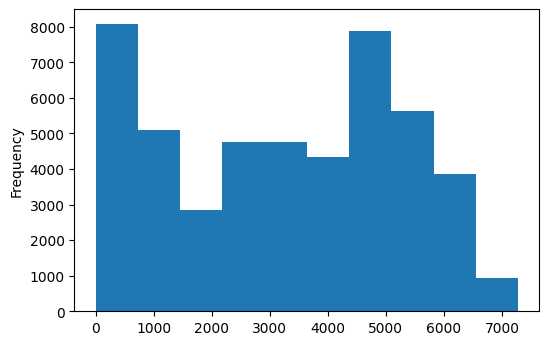

In [14]:
traffic_df['traffic_volume'].plot.hist()
plt.show()

In [15]:
traffic_df.traffic_volume.describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars.

About 25% of the time, there were only 1,193 cars or fewer passing the station each hour , which probably occurred during the night when the road is under construction. Yet, the traffic volume was four times as much (or more) 25% of the time.
##### We might need to compare the traffic volume during nighttime versus daytime

We'll start by dividing our dataset into two parts:
- Daytime: hours from 7AM to 7PM (12 hours)
- Nighttime: hours from 7PM to 7AM (12 hours)

In [17]:
traffic_df.date_time = pd.to_datetime(traffic_df['date_time'])

In [26]:
day = (traffic_df.copy()[(traffic_df.date_time.dt.hour >= 7) & 
                         (traffic_df.date_time.dt.hour < 19)])
print(day.shape)

(23877, 9)


In [27]:
night = (traffic_df.copy()[(traffic_df.date_time.dt.hour >= 19) | 
                         (traffic_df.date_time.dt.hour < 7)])
print(night.shape)

(24327, 9)


This significant difference in row numbers between day and night is due to a few hours of missing data. For instance, if you look at rows 176 and 177 (i_94.iloc[176:178]), you'll notice there's no data for two hours (4 and 5).

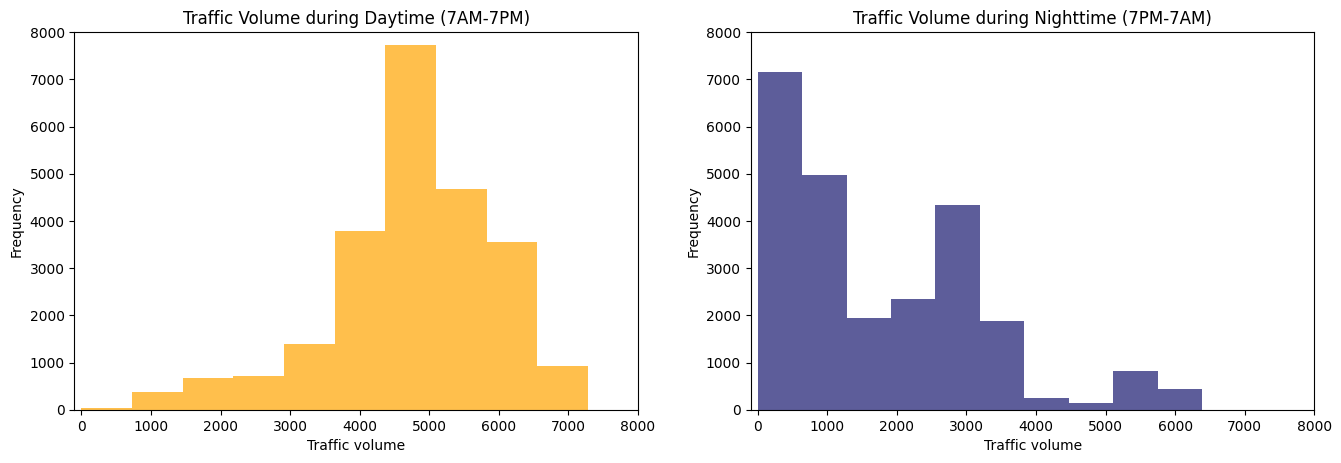

In [78]:
plt.figure(figsize=(16,5))

#Histogram for daytime
plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'], color='orange', alpha=0.7)
plt.title('Traffic Volume during Daytime (7AM-7PM)')
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')
plt.xlim((-100, 8000))
plt.ylim((0, 8000))

#Histogram for nighttime
plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'], color='midnightblue', alpha=0.7)
plt.title('Traffic Volume during Nighttime (7PM-7AM)')
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')
plt.xlim((-100, 8000))
plt.ylim((0, 8000))
plt.show()

In [49]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [50]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram for daytime data is more left skewed, meaning that most of the time during the day the traffic volume is high. About 75% of the time, 4252 and more cars were recorded passing the station in each hour.

While the nighttime histogram is more right skewed. This means that most the traffic volumes recorded are low during night time. No more than 2819 cars travelled the road for 75% of the time.

Although there were measurementst of more than 5000 cars per hour, the traffic in the night was generally light.

## Time indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

In [51]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

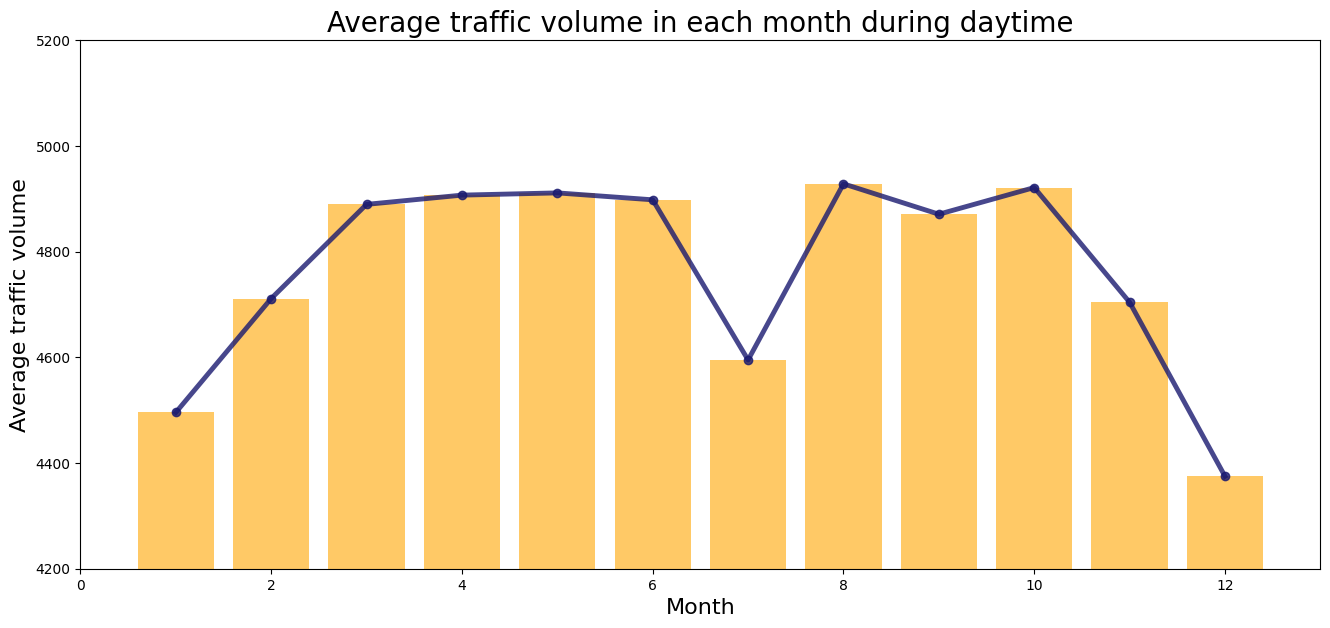

In [94]:
plt.figure(figsize=(16, 7))
plt.bar(by_month.index, by_month['traffic_volume'], alpha=0.6,
       color='orange')
plt.plot(by_month.index, by_month['traffic_volume'],
         lw=3.5, color='midnightblue', alpha=0.8, marker='o')
plt.xlim(0, 13)
plt.ylim(4200, 5200)
plt.xlabel('Month',fontsize=16)
plt.ylabel('Average traffic volume',fontsize=16)
plt.title('Average traffic volume in each month during daytime',fontsize=20)
plt.show()

The figure depicts that traffic volume was low during the cold months (November - February) yet more intense in warmer time (March - October, except July). Is there anything special about July? Why is the traffic less dense in this month?

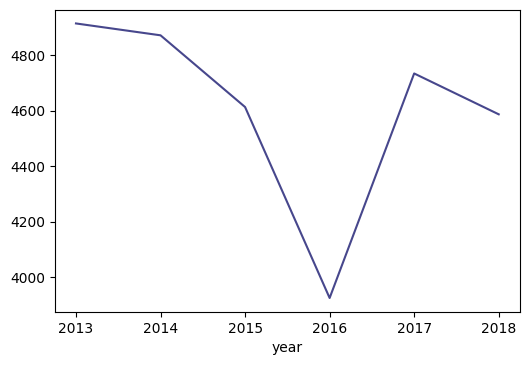

In [105]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line(
                                                        color='midnightblue',
                                                        alpha=0.8)
plt.show()

The traffic is typically heavy in July with the only exception in year 2016. One possible reason for this was because of road construction in 2016, via [this article](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696)

As a tentative conclusion here, we can say that warm months generally show heavier traffic compared to cold months. In a warm month, you can can expect for each hour of daytime a traffic volume close to 5,000 cars.

##### We shall now look at each day of the weeks

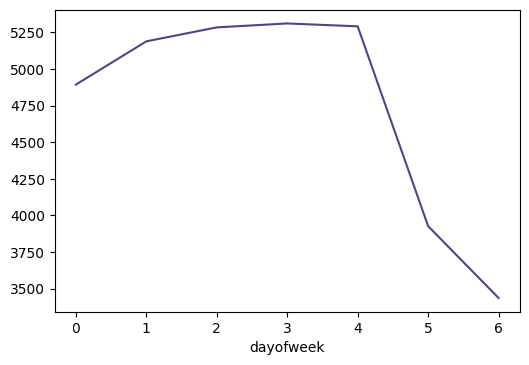

In [106]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line(color='midnightblue',
                                                        alpha=0.8)
plt.show()

We can clearly see that traffic is extremely intense during business days (Monday - Friday, 0: Monday) but becomes significantly more sparse during the weekends. You can expect to see more than 5000 cars (except for Monday which records just under 5000) if you commute on week days.

Since weekends data might drag down the average traffic flow, so we will split into separate weekends and business days.
#### Let's dive deeper into the time of a day

##### Ploting average traffic volume based on time of the day during weekdays vs weekends

In [107]:
day['hour'] = day['date_time'].dt.hour
business_day = day.copy()[day['dayofweek'] <= 4] #Mon to Fri
weekend = day.copy()[day['dayofweek'] > 4] #Sat and Sun
by_hour_business = business_day.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

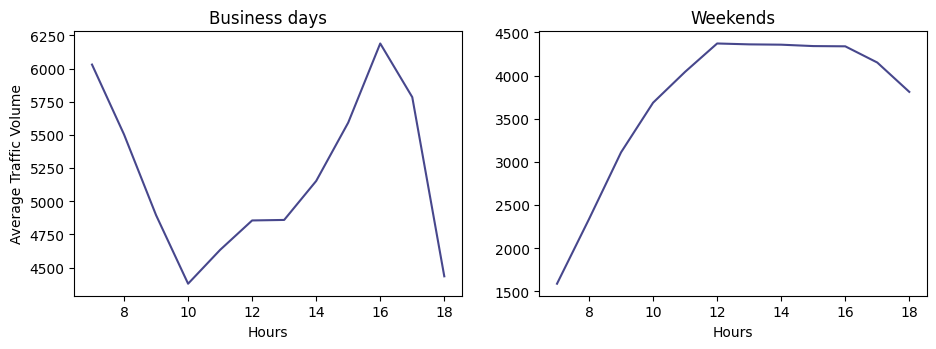

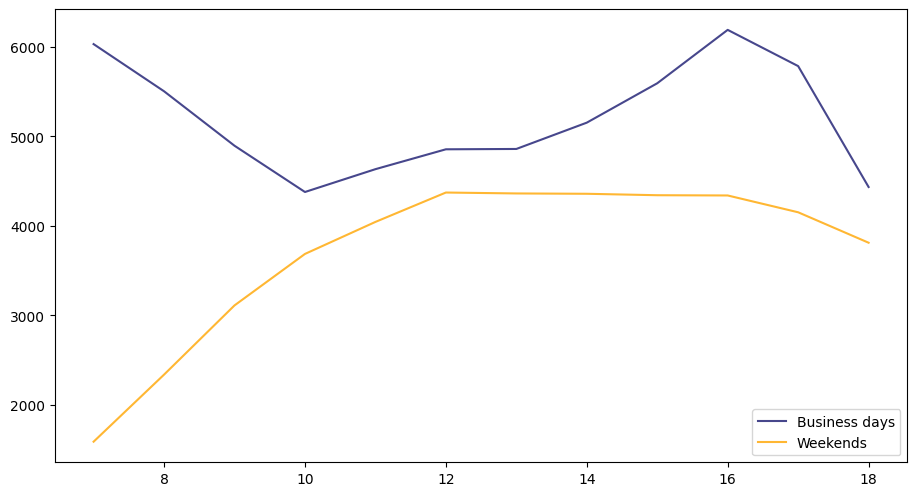

In [137]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,3.5))
#Business days
ax1.plot(by_hour_business.index, by_hour_business['traffic_volume'],
                                                color='midnightblue',
                                                alpha=0.8)
ax1.set_xlabel('Hours')
ax1.set_ylabel('Average Traffic Volume')
ax1.set_title('Business days')
#Weekends
ax2.plot(by_hour_weekend.index, by_hour_weekend['traffic_volume'],
                                             color='midnightblue',
                                              alpha=0.8)
ax2.set_xlabel('Hours')
ax2.set_title('Weekends')
plt.show()

plt.figure(figsize=(11, 6))
plt.plot(by_hour_business.index, by_hour_business['traffic_volume'], label='Business days',
        color='midnightblue', alpha=0.8)
plt.plot(by_hour_weekend.index, by_hour_weekend['traffic_volume'], label='Weekends',
        color='orange',alpha=0.8)
plt.legend(loc='lower right')
plt.show()


Traffic volume at each hour is higher than during business days compared to during Saturdays and Sundays. The rush hours are form 6AM to 4PM, the time when people commute to work and back home. We can see volumes over 6000 during the rush hours.

##### To summarize, we found a few time-related indicators of heavy traffic:

- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.

## Weather indicators

In [141]:
traffic_df.columns
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


We are going to find correlation between the traffic volume and the "numerical" weather data, which are the temperature, rain_1h, snow_1h, and clouds_all

In [145]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Temperature shows the strongest correlation with a value of just +0.13. The other relevant columns (rain_1h, snow_1h, clouds_all) don't show any strong correlation with traffic_value.

##### Visualize the correlation between temperature and traffic volume

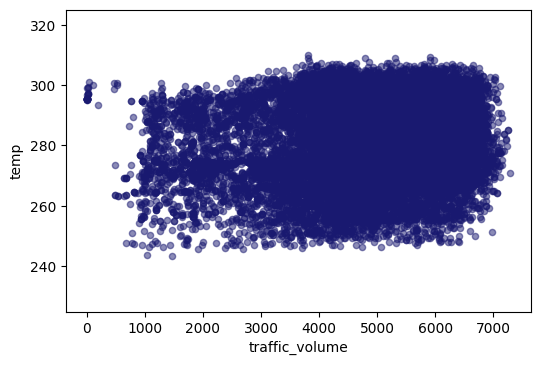

In [158]:
day.plot.scatter('traffic_volume', 'temp', color='midnightblue', alpha=0.5)
plt.ylim(225, 325) #Exclude two values of 0 Kevin 
plt.show()

We can conclude that temperature doesn't look like a solid indicator of heavy traffic.

### Let's dig into weather types
We shall now consider the relationship between traffic volume and the weather_main column

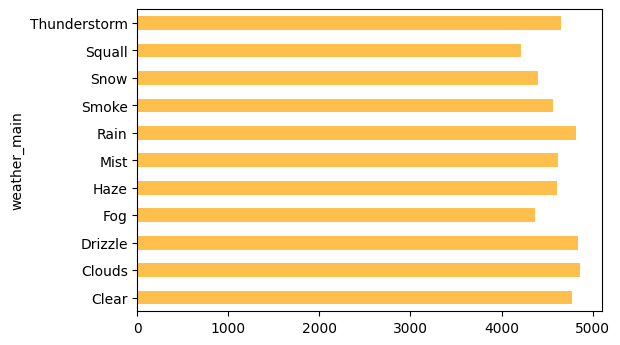

In [160]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh(color='orange',alpha=0.7)
plt.show()

It looks like the road is still crowded no matter what type of weather that mother nature brings us.

Let's also group by specific weather_description

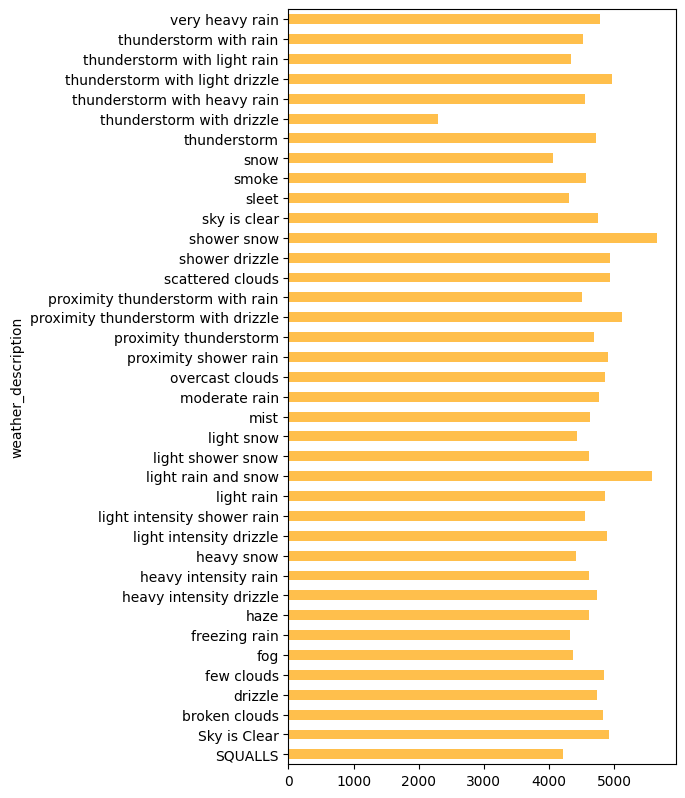

In [161]:
by_weather_description = day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10),
                                                  color='orange', alpha=0.7)
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:

- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

# Conclusion
In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

- Time indicators

 -  The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
 -  The traffic is usually heavier on business days compared to the weekends.
 -  On business days, the rush hours are around 7 and 16.
- Weather indicators

 -  Shower snow
 -  Light rain and snow
 -  Proximity thunderstorm with drizzle